https://www.tensorflow.org/tutorials/quickstart/beginner

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [5]:
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[-0.54063845,  0.33345392,  0.3249203 ,  0.1477881 , -0.19889505,
        -0.07676797,  0.04838673, -0.2683768 , -0.07781781,  0.10948873]],
      dtype=float32)

In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.057535  , 0.13789408, 0.13672236, 0.11452807, 0.08097471,
        0.09149314, 0.10369135, 0.07553945, 0.09139714, 0.11022466]],
      dtype=float32)

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [8]:
loss_fn(y_train[:1], predictions).numpy()

2.3914912

In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3007 - accuracy: 0.9115
Epoch 2/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1467 - accuracy: 0.9567
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1098 - accuracy: 0.9666
Epoch 4/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0888 - accuracy: 0.9733
Epoch 5/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0748 - accuracy: 0.9760


In [11]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 0s - loss: 0.0671 - accuracy: 0.9790


[0.06707939770829398, 0.979]

In [53]:
element = 115
preds = model.predict(x_test)
print(np.argmax(preds[element]))
print(y_test[element])

9
4


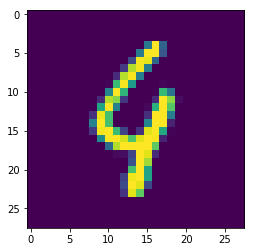

In [54]:
batch = x_test
plotData = batch[element]
plotData = plotData.reshape(28, 28)
plt.imshow(plotData)
plt.show()

In [38]:
predicted_vals = []
for pred in preds:
    predicted_vals.append(np.argmax(pred))
predicted_vals = np.array(predicted_vals)

In [47]:
eval_preds = y_test == predicted_vals
for i in range(len(eval_preds)):
    if eval_preds[i] != True:
        print(i)

8
115
149
151
247
259
321
340
381
445
447
495
578
582
684
707
720
740
844
947
951
956
965
1014
1039
1112
1181
1182
1226
1232
1242
1247
1260
1290
1319
1325
1326
1328
1393
1500
1522
1530
1549
1553
1609
1671
1681
1717
1737
1754
1790
1800
1901
1952
2016
2024
2035
2040
2043
2044
2053
2070
2098
2109
2118
2130
2135
2174
2182
2185
2272
2293
2329
2369
2387
2422
2454
2488
2598
2654
2877
2896
2915
2921
2927
2930
2939
2953
3005
3060
3073
3117
3503
3520
3558
3559
3565
3597
3718
3727
3751
3776
3780
3796
3808
3838
3853
3906
3941
3943
3946
4000
4065
4078
4152
4156
4176
4199
4212
4224
4248
4289
4294
4360
4435
4443
4497
4536
4547
4567
4571
4601
4635
4731
4761
4807
4814
4823
4860
4880
4956
4966
5046
5331
5457
5600
5623
5642
5734
5749
5887
5926
5936
5937
5955
5973
6011
6059
6166
6505
6555
6571
6572
6574
6597
6598
6625
6651
6755
6783
6817
6847
7216
7434
7732
7821
7886
7921
8020
8062
8094
8246
8311
8325
8362
8520
8522
8527
9009
9015
9019
9024
9071
9422
9587
9634
9664
9679
9700
9729
9745
9749
9755
9768
9770


In [12]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [13]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.5319978e-07, 1.4137503e-08, 2.5302265e-04, 4.4818703e-04,
        2.1825011e-11, 6.2372567e-07, 2.3543545e-13, 9.9929404e-01,
        1.6236490e-07, 3.9162910e-06],
       [1.1557072e-08, 1.6341430e-06, 9.9977332e-01, 2.1024476e-04,
        4.3787322e-15, 4.7329168e-06, 1.9414351e-06, 3.4656235e-13,
        8.2549986e-06, 7.9936500e-12],
       [5.9445813e-07, 9.9876910e-01, 1.7667467e-04, 1.4393929e-05,
        9.8171449e-06, 4.8822444e-06, 9.4129800e-06, 9.3469012e-04,
        7.9828773e-05, 7.0848449e-07],
       [9.9994254e-01, 2.9749199e-08, 1.2103071e-05, 1.1102992e-07,
        3.3246264e-10, 3.9529896e-06, 3.9140235e-05, 4.1652662e-08,
        4.6092787e-09, 1.9991191e-06],
       [2.0304971e-07, 1.1285057e-09, 7.2774134e-07, 3.9631775e-08,
        9.9811327e-01, 1.0595721e-07, 4.2594360e-07, 5.4580636e-05,
        6.3118461e-07, 1.8299004e-03]], dtype=float32)>